The CRISP-DM method will be applied here to keep track of the analysis process

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor

## 1. Business Understanding
Being a football fan and local famous striker means exploring FIFA19 player datsset could be so much fun.

I will focus on the three question below:

Q1: What's the ratio of total wages/ total potential for clubs. Which clubs are the most economical ？

Q2: What's the age distribution like? How is it related to player's overall rating?

Q3: How is a player's skils set influence his potential? Can we predict a player's potential based on his skills' set?

## 2. Data Understanding

In [2]:
# load dataset
fifa19_player_df = pd.read_csv('data.csv')
fifa19_player_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# num of players
fifa19_player_df.shape[0]

18207

In [4]:
# data format for each column
fifa19_player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [5]:
# What kind information is provied?
fifa19_player_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
# missing values
fifa19_player_df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

# 3. Prepare Data
There are some necessary stpes to apply before continue exploring the dataset:

Drop unused columns

Convert string values to number

Handle missing values, drop them if necessary

In [7]:
# Drop unused columns
columns_to_drop = ['Unnamed: 0', 'ID', 'Photo', 'Flag','Club Logo', 'Preferred Foot', 
                   'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From',
                   'Contract Valid Until', 'Height', 'Weight','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                   'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
                   'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause']

fifa19_player_df.drop(columns_to_drop, axis=1, inplace=True)

In [8]:
fifa19_player_df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,5.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,5.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,4.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,4.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [9]:
# Convert value/wage string to number
# Example: €110.5M -> 110.5 * 1000000
def str2number(amount):
    """
    This function convert amount string to float 
    
    Parameter:
    amount(str): Amount string with M & K as Abbreviation for Million and Thousands
    
    Returns:
    float: A float number represents the numerical value of the input parameter amount(str)
    """
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])

In [10]:
# Convert value, wage to number
# First convert value, wage string to actual amount, then divide by 1 million and 1 k. 
fifa19_player_df['Value_M'] = fifa19_player_df['Value'].apply(lambda x: str2number(x) / 1000000)
fifa19_player_df['Wage_K'] = fifa19_player_df['Wage'].apply(lambda x: str2number(x) / 1000)

# Drop original value & wage column
fifa19_player_df.drop(['Value', 'Wage'], axis=1, inplace=True)

In [11]:
# From below we can see that highest player value is 118.8m and wage is 565k
# Which are Neymar Jr and L. Messi respectively.
fifa19_player_df.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,...,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,2.410696,9.731312
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,...,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,5.594933,21.999290
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,...,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,...,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.300000,1.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,...,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.675000,3.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,...,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,2.000000,9.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,...,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,118.500000,565.000000


In [12]:
# Missing value handling
missing_player_df = fifa19_player_df[fifa19_player_df['Agility'].isnull()]

In [13]:
missing_player_df.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K
count,48.000000,48.0,48.000000,48.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.000000,48.000000
mean,25.000000,62.0,66.833333,1562.229167,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.354375,1.687500
std,4.472136,0.0,5.272705,127.956981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117354,0.992659
min,17.000000,62.0,62.000000,1141.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,1.000000
25%,22.000000,62.0,62.000000,1506.750000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,1.000000
50%,25.000000,62.0,65.500000,1576.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337500,1.000000
75%,27.000000,62.0,70.000000,1664.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.425000,2.000000
max,37.000000,62.0,82.000000,1740.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650000,5.000000


We can see that quite a few columns which are related to players' skills got 48 missing values.

So there were 48 players that simply missing these values.

But we will reserve those players for Q1 and Q2 since there were no missing value in Value_M and Wage_K column.

For Q3, we will drop those player rows since there were just too many missing values here.

## 4. Answer Questions base on dataset
### Q1: What's the ratio of total wages/ total potential for clubs. Which clubs are the most economical ？

In [14]:
club_wages = fifa19_player_df.groupby('Club').sum()

In [15]:
club_player_count = fifa19_player_df.groupby('Club').count()

In [16]:
# Number of clubs and average number of players in each club
print('Number of clubs is {}'.format(club_player_count.shape[0]))
print('Average number players in each club is {}'.format(round(club_player_count['Age'].mean(),2)))
print('Total Average wage(K) potential ratio is {}'
      .format(round(club_wages['Wage_K'].sum() / club_wages['Potential'].sum(), 2)))

Number of clubs is 651
Average number players in each club is 27.6
Total Average wage(K) potential ratio is 0.14


In [17]:
club_wages['Wage/Potential'] = club_wages['Wage_K'] / club_wages['Potential']
club_wages['Player Number'] = club_player_count['Age']
club_wages['Player Average Age'] = club_wages['Age'] / club_wages['Player Number']

In [18]:
club_wages.sort_values('Wage/Potential', ascending=False, inplace=True)

In [19]:
club_wages.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K,Wage/Potential,Player Number,Player Average Age
Club,,,,,,,,,,,,,,,,,,,,,
Real Madrid,793,2582,2793,60025,69.0,106.0,94.0,1934.0,1750.0,1887.0,...,627.0,627.0,583.0,579.0,615.0,874.425,5017.0,1.796276,33,24.030303
FC Barcelona,787,2575,2815,60791,74.0,108.0,94.0,1974.0,1805.0,1850.0,...,599.0,601.0,623.0,615.0,617.0,852.600,4837.0,1.718295,33,23.848485
Juventus,679,2057,2138,47610,63.0,80.0,72.0,1517.0,1282.0,1583.0,...,419.0,402.0,386.0,438.0,450.0,704.475,3292.0,1.539757,25,27.160000
Manchester City,789,2532,2769,60617,69.0,104.0,92.0,1970.0,1726.0,1852.0,...,592.0,570.0,578.0,577.0,560.0,786.555,3741.0,1.351029,33,23.909091
Manchester United,817,2549,2728,62117,69.0,106.0,100.0,2054.0,1862.0,2056.0,...,547.0,545.0,563.0,537.0,565.0,588.850,3391.0,1.243035,33,24.757576


Text(0.5, 1.0, 'Top 10 clubs spending wage(K) on players potential')

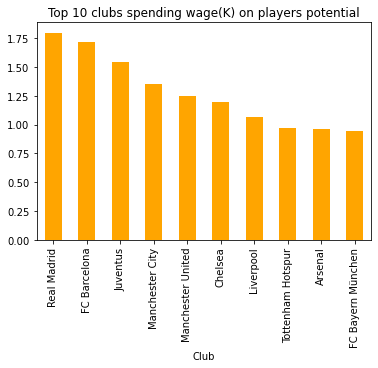

In [20]:
club_wages['Wage/Potential'].head(10).plot(kind='bar', color='Orange')
plt.title('Top 10 clubs spending wage(K) on players potential')

Text(0.5, 1.0, 'Top 10 economical clubs ')

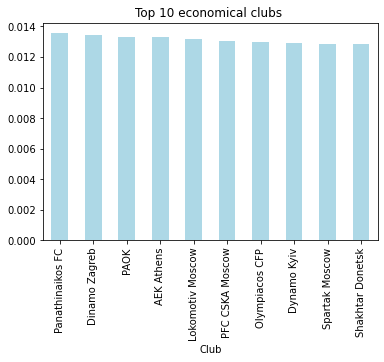

In [21]:
club_wages['Wage/Potential'].tail(10).plot(kind='bar', color='lightblue')
plt.title('Top 10 economical clubs ')

From the result and plot, it's obvious that the 'Giant' clubs including Real Madrid, Bacelona, and clubs from EPL are willing to spend much more wage for high potential players than average clubs. This is how they stay competitive in leagues.

But surprisingly, the economical clubs are not clubs from nowhere that we never heard of. Some of them are even quite famous like AEK Athens, Dynamo Kyiv. This suggests that those clubs' players are potiential but underpayed. It maybe a good approach for 'Giant' clubs to import more econimical players from them to reduce their overall wage spent.

Q2: What's the age distribution like? How is it related to player's overall rating?

In [22]:
# Calculate age count
age_count = fifa19_player_df['Age'].value_counts()
age_count.sort_index(ascending=True, inplace=True)

In [23]:
# Calculate average overall rating
age_mean = fifa19_player_df.groupby('Age').mean()

In [24]:
# Plot age distribution and overall rating together
age_count_list = age_count.values.tolist()
age_overall_rating_list = age_mean['Overall'].values.tolist()

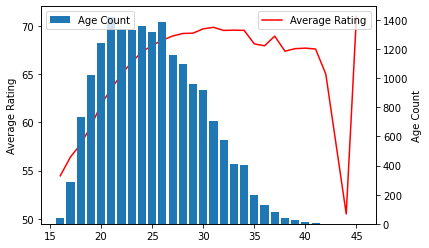

In [25]:
ages = age_count.index.values.tolist()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ages,age_overall_rating_list, color = 'red', label='Average Rating')
ax1.legend(loc=1)
ax1.set_ylabel('Average Rating')

ax2 = ax1.twinx()
plt.bar(ages, age_count_list, label='Age Count')
ax2.legend(loc=2)
ax2.set_ylabel('Age Count')
plt.show()

From above plot, we can see that most players are between 20-26 years old. And players' number start to decrease after 26 years old and speed up after 30. Reason behind this could be that many young player didn't get enough opportunities to prove themselves and give up their dream as a football player.

When a football player reaches their late 20s, they have gain enough experience and reaches peak of their rating. The golden era of a football player starts here and ends when his age reaches 35. At this age, his physical body condition drops quickly so as average rating.

There are also quite a few numbers of players with age over 37, 38 years old. This is quite a surprise especially their rating still can remain quite high.

## Continue Preparing Data for Q3

In [26]:
# Drop unused columns for Q3
columns_to_drop_q3 = ['Name', 'Nationality', 'Club']
fifa19_player_df.drop(columns_to_drop_q3, axis=1, inplace=True)

In [27]:
# Drop the 48 players whose skill set is missing.
fifa19_player_df.dropna(axis=0, how='any', inplace=True)

In [28]:
# Work Rate is in the format of attack work rate/defence work rate
# so need to create two new columns here.
fifa19_player_df['Work Rate Attack'] = fifa19_player_df['Work Rate'].map(lambda x: x.split('/')[0])
fifa19_player_df['Work Rate Defence'] = fifa19_player_df['Work Rate'].map(lambda x: x.split('/')[1])
fifa19_player_df.drop('Work Rate', axis=1, inplace=True)

In [29]:
fifa19_player_df.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Position,Crossing,Finishing,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K,Work Rate Attack,Work Rate Defence
0,31,94,94,2202,5.0,4.0,4.0,RF,84.0,95.0,...,26.0,6.0,11.0,15.0,14.0,8.0,110.5,565.0,Medium,Medium
1,33,94,94,2228,5.0,4.0,5.0,ST,84.0,94.0,...,23.0,7.0,11.0,15.0,14.0,11.0,77.0,405.0,High,Low
2,26,92,93,2143,5.0,5.0,5.0,LW,79.0,87.0,...,33.0,9.0,9.0,15.0,15.0,11.0,118.5,290.0,High,Medium
3,27,91,93,1471,4.0,3.0,1.0,GK,17.0,13.0,...,13.0,90.0,85.0,87.0,88.0,94.0,72.0,260.0,Medium,Medium
4,27,91,92,2281,4.0,5.0,4.0,RCM,93.0,82.0,...,51.0,15.0,13.0,5.0,10.0,13.0,102.0,355.0,High,High


In [30]:
# One Hot Encoding for Position, Work Rate Attack, Work Rate Defence
one_hot_columns = ['Position', 'Work Rate Attack', 'Work Rate Defence']
fifa19_player_df = pd.get_dummies(fifa19_player_df, columns=one_hot_columns, prefix = one_hot_columns)

In [31]:
fifa19_player_df.shape

(18147, 76)

## 5. Train model and Measure Performance

In [32]:
y = fifa19_player_df['Potential']
X = fifa19_player_df.drop(['Value_M', 'Wage_K', 'Potential', 'Overall'], axis=1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [34]:
ForestRegressor = RandomForestRegressor(n_estimators=500)
ForestRegressor.fit(X_train, y_train)
y_test_preds = ForestRegressor.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))

0.8709275531070444
4.932486930394858


In [35]:
coefs_df = pd.DataFrame()

coefs_df['Features'] = X_train.columns
coefs_df['Coefs'] = ForestRegressor.feature_importances_
coefs_df.sort_values('Coefs', ascending=False).head(10)

,Features,Coefs
14,BallControl,0.264548
18,Reactions,0.201532
0,Age,0.179467
32,StandingTackle,0.066885
38,GKReflexes,0.025739
34,GKDiving,0.023053
1,Special,0.019209
7,HeadingAccuracy,0.017075
26,Interceptions,0.015311
31,Marking,0.014727


Ball control, reactions, and age are the main three features that decides a player's potential. This is same to our perception.

Young players with excellent ball control and fast reactions tends to give us an outstanding performance in football match.

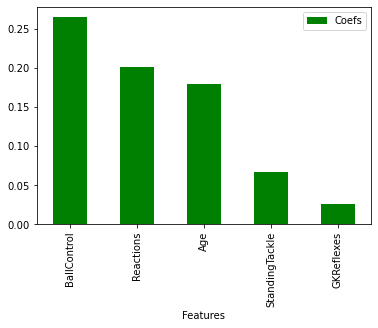

In [36]:
coefs_df.set_index('Features', inplace=True)
coefs_df.sort_values('Coefs', ascending=False).head(5).plot(kind='bar', color='green')

# THANK YOU